<a href="https://colab.research.google.com/github/adfhsjt/PCVK25_3F_02/blob/main/Week3_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Ahmad Dzul Fadhli Hannan
# Nomor : 02
# Kelas : TI-3F

# Praktikum

## D1. Operasi Citra Sederhana

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-583491730.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


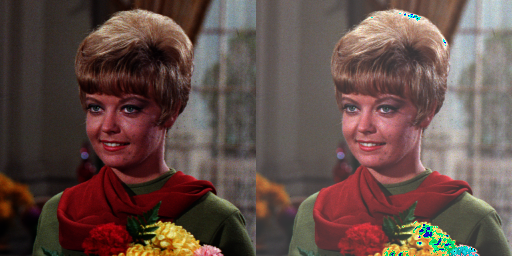

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, alpha=1, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Tugas Praktikum D1

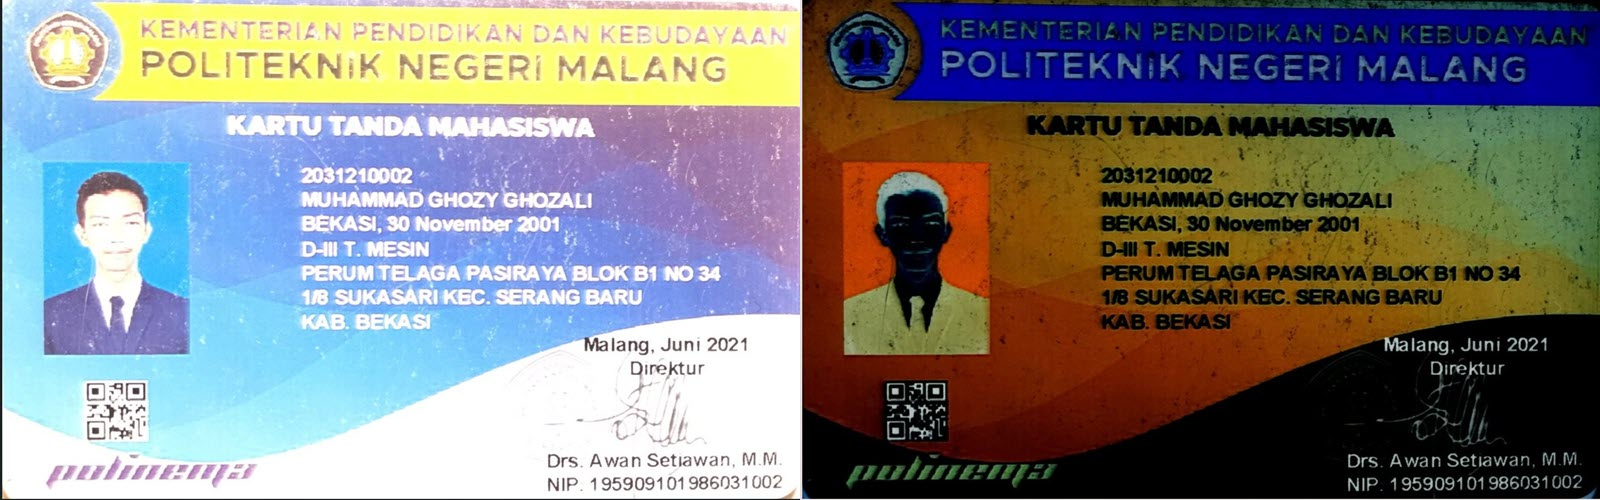

In [ ]:
# Soal 1 inverse color
ktm_lama = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/KTM lama.jpg')
color_image = np.zeros(ktm_lama.shape, ktm_lama.dtype)

# akses per pixel
for y in range(ktm_lama.shape[0]):
  for x in range(ktm_lama.shape[1]):
    for c in range(ktm_lama.shape[2]):
      color_image[y,x,c] = 255 - ktm_lama[y,x,c]

# cara simple tanpa for loop
# result_image = 255 - ktm_lama
# inverse_color_image = cv.convertScaleAbs(ktm_lama, alpha=-1, beta=255)

final_frame = cv.hconcat((ktm_lama, color_image))
cv2_imshow(final_frame)


 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


/tmp/ipython-input-242043791.py:17: RuntimeWarning: overflow encountered in scalar add
  result_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


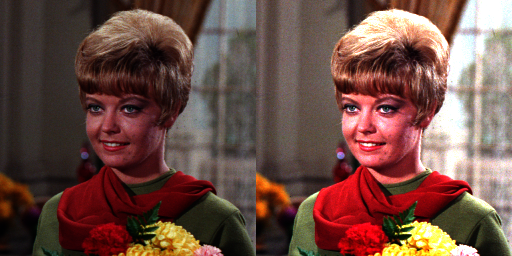

In [ ]:
# Soal 2 brightness dan konstras
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  kontras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/female.tiff')
result_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      result_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
      result_image[y,x,c] = np.clip(kontras * (original[y,x,c]), 0, 255)


# cara simple tanpa for loop
# result_image = cv.convertScaleAbs5(original, alpha=kontras, beta=brightness)

final_frame = cv.hconcat((original, result_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


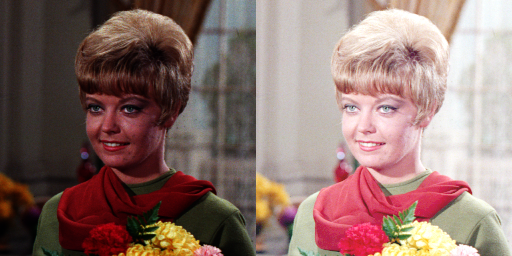

In [ ]:
# Soal 3 transformasi logarithmic brigthness
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try:
  C = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/female.tiff')
result_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c_channel in range(original.shape[2]):
      log_value = C * np.log(1 + original[y,x,c_channel])
      result_image[y,x,c_channel] = np.clip(log_value, 0, 255)

# cara simple tanpa for loop
# result_image = cv.convertScaleAbs5(original, alpha=kontras, beta=brightness)

final_frame = cv.hconcat((original, result_image))
cv2_imshow(final_frame)

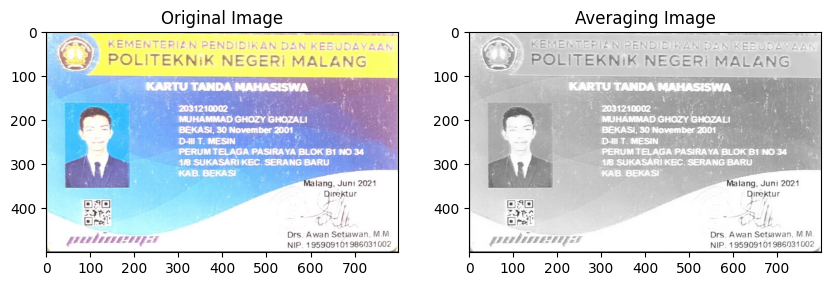

/tmp/ipython-input-2255032909.py:28: RuntimeWarning: overflow encountered in scalar add
  light = int((mx + mn) / 2)


Text(0.5, 1.0, 'Luminance Image')

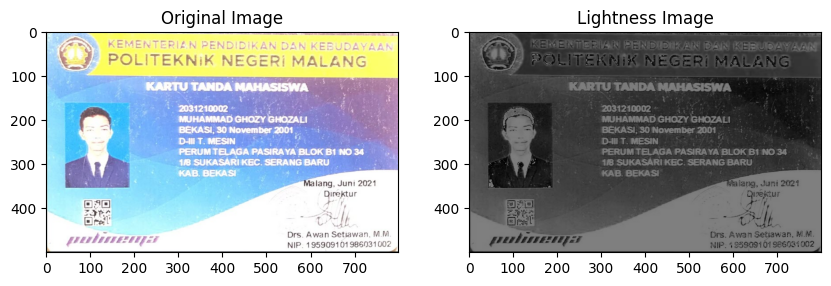

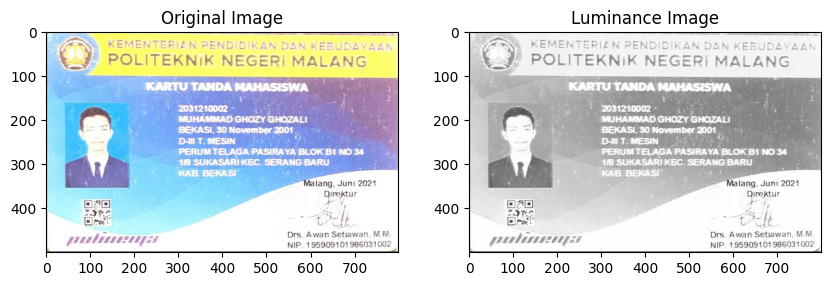

In [ ]:
# Soal 4 transformasi grayscale

ktm_lama = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/KTM lama.jpg')
ktm_rgb = cv.cvtColor(ktm_lama, cv.COLOR_BGR2RGB)
result_image = np.zeros(ktm_lama.shape, ktm_lama.dtype)

averaging = np.zeros_like(ktm_lama)
for y in range(ktm_lama.shape[0]):
    for x in range(ktm_lama.shape[1]):
        avg = int(np.mean(ktm_lama[y, x]))
        averaging[y, x] = [avg, avg, avg]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(ktm_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(averaging)
plt.title('Averaging Image')
plt.show()

lightness = np.zeros_like(ktm_lama)
for y in range(ktm_lama.shape[0]):
    for x in range(ktm_lama.shape[1]):
        B, G, R = ktm_lama[y, x]
        mx = max(B, G, R)
        mn = min(B, G, R)
        light = int((mx + mn) / 2)
        lightness[y, x] = [light, light, light]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(ktm_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(lightness)
plt.title('Lightness Image')

luminance = np.zeros_like(ktm_lama)
for y in range(ktm_lama.shape[0]):
    for x in range(ktm_lama.shape[1]):
        R, G, B = ktm_rgb[y, x]
        lum = int(0.21 * R + 0.72 * G + 0.07 * B)
        luminance[y, x] = [lum, lum, lum]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(ktm_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(luminance)
plt.title('Luminance Image')


Text(0.5, 1.0, 'Result Image')

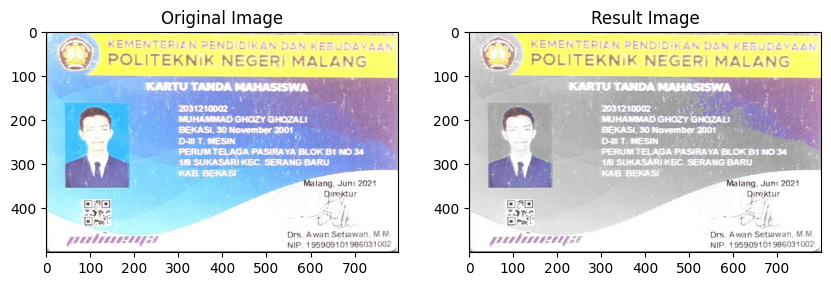

In [81]:
# Soal 5 Ubah warna biru menjadi grayscale

ktm_lama = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/KTM lama.jpg')
ktm_rgb = cv.cvtColor(ktm_lama, cv.COLOR_BGR2RGB)
result_image = np.zeros(ktm_lama.shape, ktm_lama.dtype)

for y in range(ktm_lama.shape[0]):
    for x in range(ktm_lama.shape[1]):
        B, G, R = ktm_lama[y, x]
        if B > 200:
            gray = int(np.mean([B, G, R]))
            result_image[y, x] = [gray, gray, gray]
        else:
            result_image[y, x] = [B, G, R]

result_rgb = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(ktm_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Result Image')